<a href="https://colab.research.google.com/github/20104047TranThiMyNgoc/AI-Subject/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BT/ tien

/content/drive/.shortcut-targets-by-id/1RhyDbz8sumcr_A27lkVwoL4keJgaMkNr/Colab Notebooks/BT/ tien


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/ tien/train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 480 images belonging to 8 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/ tien/validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 480 images belonging to 8 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 8 tín hiệu ra
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
15/15 [==============================] - 414s 28s/step - loss: 2.7205 - accuracy: 0.1187 - val_loss: 2.0582 - val_accuracy: 0.2937
Epoch 2/100
15/15 [==============================] - 20s 1s/step - loss: 2.0669 - accuracy: 0.1604 - val_loss: 2.0033 - val_accuracy: 0.3063
Epoch 3/100
15/15 [==============================] - 18s 1s/step - loss: 1.8959 - accuracy: 0.2646 - val_loss: 1.4893 - val_accuracy: 0.4208
Epoch 4/100
15/15 [==============================] - 19s 1s/step - loss: 1.5548 - accuracy: 0.4062 - val_loss: 1.6059 - val_accuracy: 0.3938
Epoch 5/100
15/15 [==============================] - 18s 1s/step - loss: 1.5716 - accuracy: 0.3854 - val_loss: 1.3550 - val_accuracy: 0.4875
Epoch 6/100
15/15 [==============================] - 18s 1s/step - loss: 1.4200 - accuracy: 0.4625 - val_loss: 1.2135 - val_accuracy: 0.4875
Epoch 7/100
15/15 [==============================] - 18s 1s/step - loss: 1.1240 - accuracy: 0.5792 - val_loss: 0.8615 - val_accuracy: 0.6812
Epoch 8/100

In [ ]:
# Lưu lại
model.save("tien.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('tien.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06606172770261765
Train Accuracy 0.9770833253860474


<function matplotlib.pyplot.show(*args, **kw)>

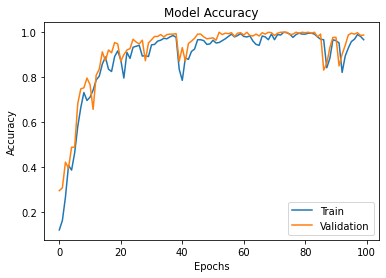

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCF84E29D0>
1/1 [==============================] - 0s 262ms/step
Menh gia tien: 10000 dong
Du lieu nam trong bo Test 1


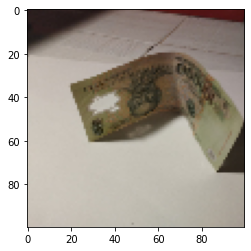

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCF8614990>
1/1 [==============================] - 0s 19ms/step
Menh gia tien: 10000 dong
Du lieu nam trong bo Test 1


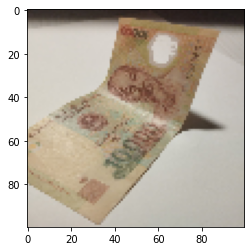

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCF83E3310>
1/1 [==============================] - 0s 16ms/step
Menh gia tien: 200000 dong
Du lieu nam trong bo Test 1


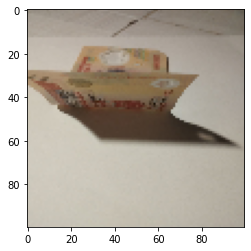

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCF8505250>
1/1 [==============================] - 0s 17ms/step
Menh gia tien: 50000 dong
Du lieu nam trong bo Test 1


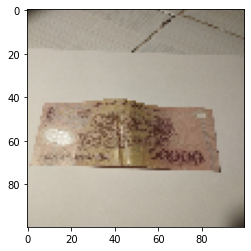

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCF80B1690>
1/1 [==============================] - 0s 68ms/step
Menh gia tien: 500000 dong
Du lieu nam trong bo Test 1


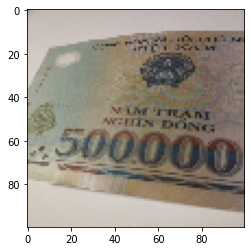

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCF8477E90>
1/1 [==============================] - 0s 64ms/step
Menh gia tien: 20000 dong
Du lieu nam trong bo Test 2


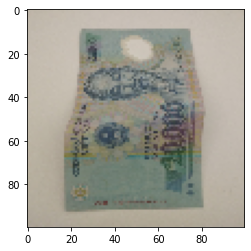

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCE01C91D0>
1/1 [==============================] - 0s 16ms/step
Menh gia tien: 10000 dong
Du lieu nam trong bo Test 2


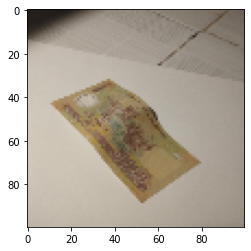

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCE00AA8D0>
1/1 [==============================] - 0s 17ms/step
Menh gia tien: 1000 dong
Du lieu nam trong bo Test 2


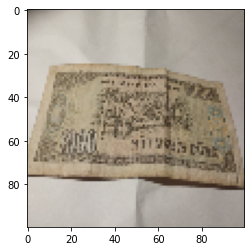

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCC923D4810>
1/1 [==============================] - 0s 18ms/step
Menh gia tien: 500000 dong
Du lieu nam trong bo Test 2


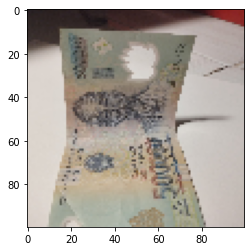

<PIL.Image.Image image mode=RGB size=100x100 at 0x7FCCE00CBFD0>
1/1 [==============================] - 0s 15ms/step
Menh gia tien: 500000 dong
Du lieu nam trong bo Test 2


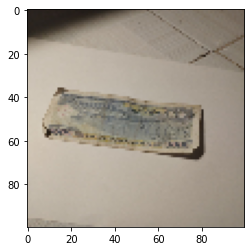

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks/BT/ tien/test/Test 1/Test 1"
test2="/content/drive/MyDrive/Colab Notebooks/BT/ tien/test/Test 2/Test 2"
test = [test1, test2]
stt = 0
prediction = " "
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(100,100))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='100000 dong'
    if round(result[0][1])==1:
      prediction='10000 dong'
    if round(result[0][2])==1:
      prediction='1000 dong'
    if round(result[0][3])==1:
      prediction='200000 dong'
    if round(result[0][4])==1:
      prediction='20000 dong'
    if round(result[0][5])==1:
      prediction='2000 dong'
    if round(result[0][6])==1:
      prediction='500000 dong'
    if round(result[0][7])==1:
      prediction='50000 dong'
    print('Menh gia tien:',prediction)
    print(f'Du lieu nam trong bo Test {stt}')

    plt.show()